<a href="https://colab.research.google.com/github/InowaR/Big-Data/blob/main/lesson3/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import time
from pathlib import Path

In [4]:
dataset_path = Path('new-york-city-airbnb-open-data', 'AB_NYC_2019.csv')
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/CooperUnion/cardataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: inowar11
Your Kaggle Key: ··········


100%|██████████| 103k/103k [00:00<00:00, 16.7MB/s]

In [8]:
from functools import reduce
import requests
import csv


from collections import defaultdict

def add_to_dict(dict, key, value):
  values = dict.setdefault(key, [])
  values.append(value)


def mapper(input_path):
    my_dict = {}
    with open(input_path, "r") as f:
      next(f)
      for line in f:
        fields = line.split(",")
        car = fields[0]
        for word in fields:
          if word.endswith('\n'):
            add_to_dict(my_dict, car, word.strip('\n'))
    return my_dict


def sum_values(dict):
  summed_dict = {}
  a = 0
  for key, values in dict.items():
    for i in values:
      a += int(i)
    summed_dict[key] = a
    a = 0
  return summed_dict



input_path = "cardataset/data.csv"

print(mapper(input_path))

summed_dict = sum_values(mapper(input_path))


cars = []
prices = []

for car, price in summed_dict.items():
  cars.append(car)
  prices.append(price)
  # print(f"\n{car}:")
  # print(f"- Средняя цена автомобиля: {int(price / len(summed_dict))}")


print(summed_dict)


{'BMW': ['46135', '40650', '36350', '29450', '34500', '31200', '44100', '39300', '36900', '37200', '39600', '31500', '44400', '37200', '31500', '48250', '43550', '32850', '38650', '48750', '34850', '40650', '44150', '32850', '46150', '50750', '46450', '49050', '51050', '44450', '38950', '33150', '35150', '40950', '47250', '41850', '41850', '43000', '49200', '49650', '43950', '41950', '50150', '37500', '43750', '39000', '39500', '39500', '34950', '45750', '43450', '37500', '41000', '32950', '41850', '47800', '39850', '38350', '40350', '38350', '42650', '33150', '35150', '44150', '45800', '38750', '35450', '33450', '40750', '42250', '42950', '40250', '49900', '47900', '44450', '42300', '40300', '40300', '42300', '45800', '47800', '43650', '49950', '47950', '41650', '48300', '50300', '43950', '41950', '56900', '46250', '50750', '42750', '48750', '48250', '42750', '50750', '40750', '54900', '48750', '40750', '52000', '50000', '41850', '50150', '41850', '58950', '43850', '48150', '56950', '

In [9]:
filename = "my_dictionary.csv"

with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    for key, value in summed_dict.items():
        writer.writerow([key, value])

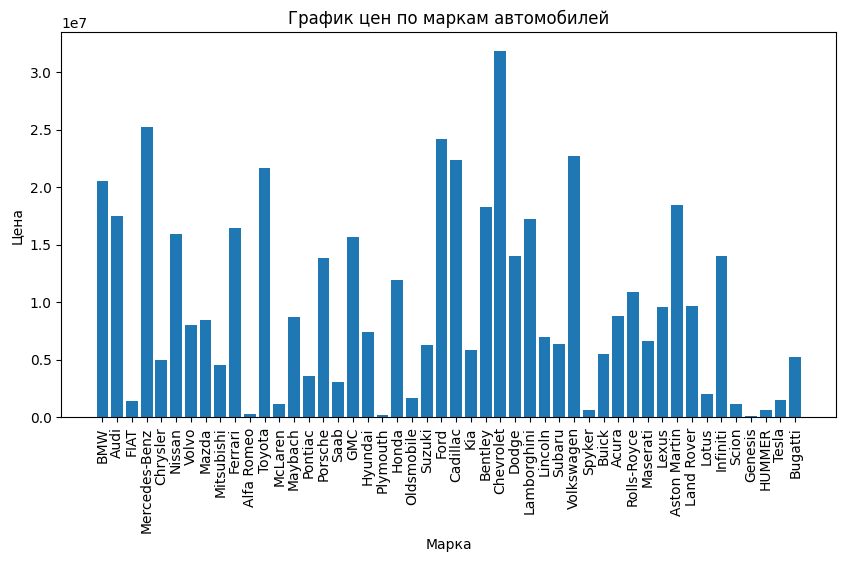

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(cars, prices)
plt.title("График цен по маркам автомобилей")
plt.xlabel("Марка")
plt.ylabel("Цена")
plt.xticks(rotation=90)
plt.show()